# Introduction

In this lab, we will learn how to create visualizations with display objects using scikit-learn. Display objects are classes that allow us to create visualizations directly from their respective metrics. In this lab, we will use the ConfusionMatrixDisplay, RocCurveDisplay, and PrecisionRecallDisplay display objects to create visualizations for a binary classification problem.

# Load Data and Train Model

For this example, we will use a blood transfusion service center dataset from OpenML. The target is whether an individual donated blood. First, the data is split into training and test datasets, and then a logistic regression model is fitted with the training dataset.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True, parser='pandas')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

# Create ConfusionMatrixDisplay

With the fitted model, we compute the predictions of the model on the test dataset. These predictions are used to compute the confusion matrix which is plotted with the **ConfusionMatrixDisplay**

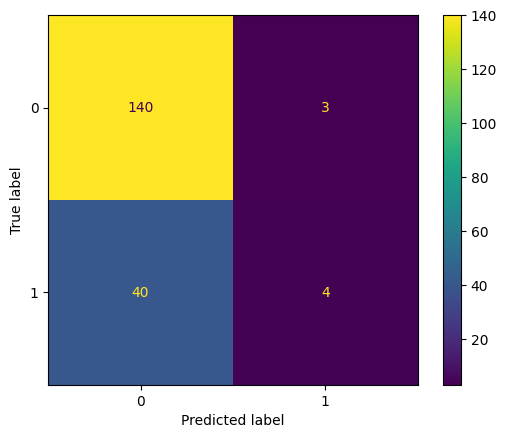

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Create RocCurveDisplay

The ROC curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the ROC curve.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


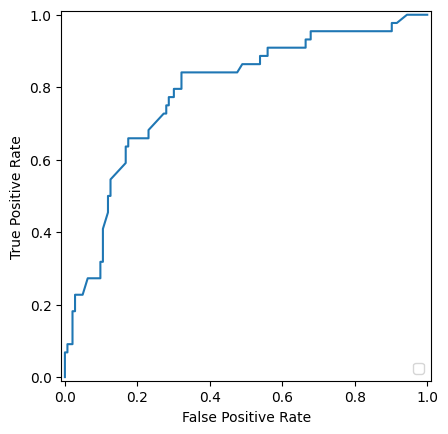

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Create PrecisionRecallDisplay

Similarly, the precision-recall curve can be plotted using **y_score** from the previous section.

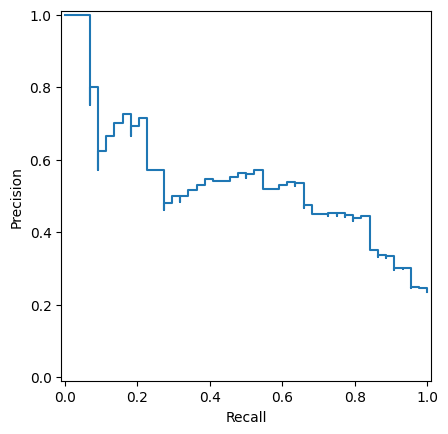

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# Combine Display Objects into a Single Plot

The display objects store the computed values that were passed as arguments. This allows for the visualizations to be easily combined using Matplotlib's API. In the following example, we place the displays next to each other in a row.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


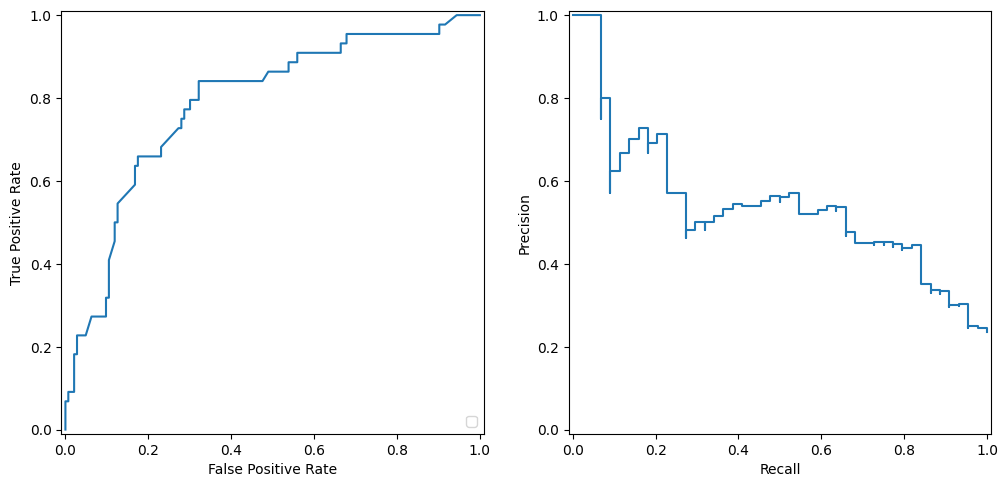

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

# Summary

In this lab, we learned how to create visualizations with display objects using scikit-learn. We used the **ConfusionMatrixDisplay**, **RocCurveDisplay**, and **PrecisionRecallDisplay** display objects to create visualizations for a binary classification problem. We first loaded the data and trained a logistic regression model. We then created the confusion matrix, ROC curve, and precision-recall curve using display objects. Finally, we combined the display objects into a single plot using Matplotlib's API.